In [54]:
from astropy.io import fits
from astropy.time import Time
import photutils
from photutils.centroids import centroid_sources, centroid_2dg, centroid_com
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import numpy as np
import glob
import math
import matplotlib.pyplot as plt 
import matplotlib
import statistics
from photutils.datasets import make_4gaussians_image
from photutils.centroids import centroid_com, centroid_quadratic
from photutils.centroids import centroid_1dg, centroid_2dg
from scipy.optimize import curve_fit
import matplotlib as mpl

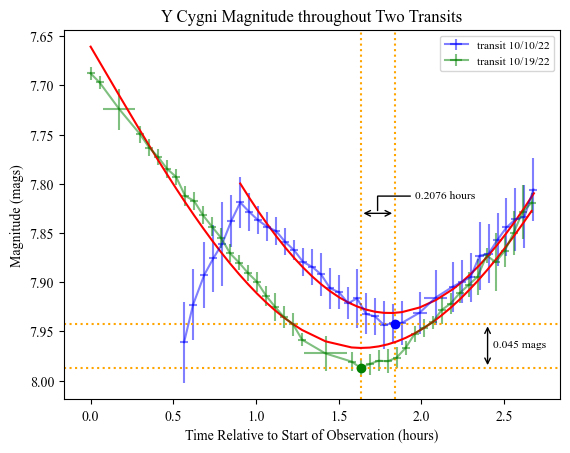

7.987073975809608
1.6323654385632835


In [92]:
#These values are for binning in groups of 20 for the data

x_1 = [59863.075913006825, 59863.078176224415, 59863.080973137796, 59863.08326603923, 59863.08552878594, 59863.08779155824, 59863.09005476974, 59863.09231811099, 59863.094581761696, 59863.0968461769, 59863.09911014011, 59863.10137334247, 59863.103637430555, 59863.10590105689, 59863.10816382858, 59863.110427132066, 59863.11269105324, 59863.11495491045, 59863.1172179386, 59863.11948178911, 59863.121745267425, 59863.12400872685, 59863.12627218019, 59863.12853597953, 59863.13079995431, 59863.13527140656, 59863.139265345395, 59863.14354233248, 59863.14580589729, 59863.14806929703, 59863.15033300682, 59863.15259551047, 59863.154858798734, 59863.1571215491, 59863.159385045685, 59863.16164768762, 59863.16391063779]
x_1_err = [0.024448391748592257, 0.02444450289476663, 0.025159415148664266, 0.02444005839060992, 0.02443524857517332, 0.024444824550300837, 0.02444219298195094, 0.024449502874631435, 0.024448274925816804, 0.024475365411490202, 0.024438581778667867, 0.024454503029119223, 0.024455555656459183, 0.024434634600766003, 0.024433947284705937, 0.024455219332594424, 0.02444500004639849, 0.024444926879368722, 0.02444364025723189, 0.024451783625409007, 0.024443026282824576, 0.024438888940494508, 0.024448508745990694, 0.024445380200631917, 0.02444526320323348, 0.04367568710586056, 0.0709156432421878, 0.024444356735330075, 0.024437806976493448, 0.02445459068985656, 0.024445818678941578, 0.024433143145870417, 0.024439005937892944, 0.02445814321981743, 0.02443526324350387, 0.024439195927698165, 0.024444546725135297]
y_1 = [7.960916357872675, 7.922755339846182, 7.892689908352048, 7.875719437596551, 7.86079520805934, 7.83780949880621, 7.818951154797579, 7.828550510195971, 7.837108841925831, 7.84364903713493, 7.848082677659556, 7.859035643876702, 7.86755567224595, 7.879517235724733, 7.884330147270575, 7.892120778842652, 7.906182617014594, 7.910252380978724, 7.921358913414377, 7.916424950649421, 7.932197941028032, 7.9347991192700755, 7.943394823365914, 7.941706393908717, 7.941245044202423, 7.930904061731877, 7.915598875664697, 7.904675542324387, 7.899617829981151, 7.894977613009781, 7.873014663551562, 7.871147087641767, 7.856873718383007, 7.844340700272458, 7.836052478321805, 7.8334147396006895, 7.805821709874503]
y_1_err = [0.041138937272975185, 0.036407939261503, 0.03363265931373445, 0.034185085771715876, 0.04260464875783625, 0.026676431372962786, 0.025646758446806212, 0.019007236209653108, 0.01433200873310386, 0.014665620257691353, 0.0144963330842563, 0.013740725839080427, 0.010084742934939042, 0.014553620625388439, 0.018438343696175363, 0.021963434783316343, 0.021048435927671943, 0.017109234809778776, 0.016133618059028878, 0.02997842851696975, 0.020747099202691726, 0.018718053651706975, 0.02414777795643924, 0.019534629036505238, 0.022385242367977794, 0.0213082226519743, 0.027946434634349857, 0.025690697788614113, 0.021742283484467214, 0.02466651288584084, 0.03442035824890312, 0.030085764665868583, 0.026928565127803793, 0.029451728343778173, 0.03210423532773027, 0.031755434855808874, 0.03183323419522031]

model_x_1 = [59863.09005476974, 59863.09231811099, 59863.094581761696, 59863.0968461769, 59863.09911014011, 59863.10137334247, 59863.103637430555, 59863.10590105689, 59863.10816382858, 59863.110427132066, 59863.11269105324, 59863.11495491045, 59863.1172179386, 59863.11948178911, 59863.121745267425, 59863.12400872685, 59863.12627218019, 59863.12853597953, 59863.13079995431, 59863.13527140656, 59863.139301077, 59863.143655504384, 59863.14591905214, 59863.14818250914, 59863.150446165324, 59863.1527086367, 59863.15497195358, 59863.157234734404, 59863.159498201145, 59863.16176081688, 59863.16402379264]
model_y_1 = [7.799735356300927, 7.814144206607185, 7.827882067519905, 7.840910661488877, 7.8531843896695, 7.8646659748207774, 7.875329810937216, 7.885137857841431, 7.894060234712246, 7.90207627508298, 7.9091619352123494, 7.915293829534884, 7.92045236447153, 7.924626083500193, 7.927800177491077, 7.929966035700374, 7.931117297212329, 7.9312505152012855, 7.9303649347966285, 7.925635596608369, 7.918186391064073, 7.907010451294219, 7.899626910835641, 7.89131904367215, 7.882109008426039, 7.872030827163873, 7.861106264043913, 7.849373196557053, 7.8368591139629995, 7.8236104655153165, 7.809659828122445]

x_2 = [59872.052359802634, 59872.05462520529, 59872.05957859223, 59872.06483179459, 59872.06709935246, 59872.06936506701, 59872.07162970151, 59872.07389508407, 59872.076161223806, 59872.078428559944, 59872.080698629994, 59872.08296539474, 59872.08523222953, 59872.087500045076, 59872.089767384256, 59872.09203438962, 59872.09430052083, 59872.09656609406, 59872.09883137244, 59872.101097399485, 59872.103364029, 59872.10563024671, 59872.11154638341, 59872.11811023209, 59872.12037502924, 59872.1226402991, 59872.12490598745, 59872.1271727589, 59872.12943885112, 59872.13170555008, 59872.133973043376, 59872.13623971979, 59872.13850729958, 59872.140774507796, 59872.14304155519, 59872.14530737329, 59872.14757344237, 59872.14984050926, 59872.152107414106, 59872.15437354471, 59872.15664052144, 59872.158907243545, 59872.161174044224, 59872.16344065485]
x_2_err = [0.02445140347117558, 0.02446896198671311, 0.09614017547573894, 0.024494985351338983, 0.024479985411744565, 0.02445228077704087, 0.024454941507428885, 0.02447409345768392, 0.024461184279061854, 0.024564561434090137, 0.024480102409143, 0.024488304101396352, 0.024486213515046984, 0.024486418173182756, 0.024486111185979098, 0.024475482408888638, 0.024473333323840052, 0.024469853786285967, 0.02446956146741286, 0.02448630117578432, 0.024471915210597217, 0.024485190049745142, 0.12762790935812518, 0.024457485415041447, 0.02446457598125562, 0.024463932670187205, 0.024482689972501248, 0.024472953169606626, 0.024475350743159652, 0.024480687046889216, 0.02448112569982186, 0.024487836111802608, 0.02448064339114353, 0.024495701829437166, 0.02447573107201606, 0.024471929878927767, 0.02448988304240629, 0.024490833340678364, 0.024478172650560737, 0.024471038079354912, 0.024482763139531016, 0.02447587705682963, 0.02448293863562867, 0.02449039468774572]
y_2 = [7.687857720687955, 7.697070150440418, 7.724186024298278, 7.749707793144026, 7.763154896909985, 7.772741069223983, 7.784838361657665, 7.7929780474351285, 7.812232639591867, 7.81742473830584, 7.832099651635244, 7.843710363723364, 7.855016830033875, 7.870703784210165, 7.8801147587364495, 7.8908072815160795, 7.899723138168414, 7.913781083397905, 7.925083441144832, 7.935545328544403, 7.9427733267591325, 7.95842841688598, 7.972409582599188, 7.980641777827128, 7.987073975809608, 7.983156244611877, 7.979734222026715, 7.980295961555305, 7.976615166563463, 7.966761668876655, 7.95251475046562, 7.94634625044595, 7.9407913399801435, 7.928193035133542, 7.9217322935749745, 7.91117785919994, 7.902769508980652, 7.8945293890104224, 7.872814167674961, 7.879556266197449, 7.868415826344042, 7.850008967585884, 7.8285911739893566, 7.819192954580587]
y_2_err = [0.006720689349048394, 0.006815568661073575, 0.020708912364342965, 0.008902647943141209, 0.008902937285267806, 0.008466747982987115, 0.00929769536288629, 0.007889987596904017, 0.010062025645873544, 0.009408503068258623, 0.009170890733344709, 0.009568035634459656, 0.009879362066938685, 0.009099749461375588, 0.00729117907562573, 0.00791200003806032, 0.010291962664291913, 0.010280284691447197, 0.01459374803353115, 0.010976931219685848, 0.011562316570428999, 0.006755763817525329, 0.018277057023626243, 0.009963756132501746, 0.008485707780021308, 0.010707460809939296, 0.010368811510449074, 0.011966758869000024, 0.011018625569086732, 0.007211672792681893, 0.00845759795681961, 0.009183310426790605, 0.006799847653710607, 0.014188920682141844, 0.01062853470573343, 0.009854457085141132, 0.012674516112499385, 0.01828273990704254, 0.007651758229524348, 0.02962957583850504, 0.015772024188463126, 0.022734841234769536, 0.027417420967314747, 0.010145627505528314]

model_x_2 = x_2
model_y_2 = [7.660691276289674, 7.676290261195584, 7.710368714758265, 7.746025019124697, 7.761123057455199, 7.775967792038409, 7.790520833189966, 7.804750978453904, 7.818615883442914, 7.83207671994044, 7.8451016159914895, 7.857617558101123, 7.869607178216268, 7.881039421139118, 7.891872913706873, 7.902076591576547, 7.911618346414933, 7.920471924745694, 7.928612576809193, 7.9360197675149005, 7.942670449747553, 7.948541883864694, 7.960084367663995, 7.966278693256449, 7.966771196820289, 7.966415354468167, 7.96521172601256, 7.9631626768241786, 7.960275632913358, 7.956557538594039, 7.952018323427884, 7.946674654313829, 7.940538253140612, 7.933630454263789, 7.925971333296506, 7.917587837161864, 7.908499755096751, 7.8987304052888625, 7.888313317485946, 7.877282514660599, 7.865662726726406, 7.853493743640994, 7.8408098496532155, 7.827650110997185]


mod_x_1 = []
for i in x_1:
    mod_x_1.append((i+9-x_2[0])*24)
    
mod_x_2 = []
for i in x_2:
    mod_x_2.append((i-x_2[0])*24)
    
model_mod_x_1 = []
for i in model_x_1:
    model_mod_x_1.append((i+9-x_2[0])*24)
    
model_mod_x_2 = []
for i in model_mod_x_2:
    model_mod_x_2.append((i-x_2[0])*24)
    
x_dash_1 = 1.84
y_dash_1 = 7.942

x_dash_2 = 1.6323654385632835
y_dash_2 = 7.987073975809608


plt.errorbar(mod_x_1, y_1, xerr = x_1_err, yerr = y_1_err, linestyle = "solid", label ='transit 10/10/22', color = 'blue', alpha = 0.5)
plt.errorbar(mod_x_2, y_2, xerr = x_2_err, yerr = y_2_err, linestyle = "solid", label = 'transit 10/19/22', color = 'green', alpha = 0.5)
matplotlib.pyplot.axhline(y_dash_1, color = "orange", linestyle = "dotted")
matplotlib.pyplot.axhline(y_dash_2, color = "orange", linestyle = "dotted")
matplotlib.pyplot.axvline(x_dash_1, color = "orange", linestyle = "dotted")
matplotlib.pyplot.axvline(x_dash_2, color = "orange", linestyle = "dotted")
plt.plot(1.84, 7.942, "bo") 
plt.plot(1.6323654385632835,7.987073975809608, "go") 

plt.plot(model_mod_x_1, model_y_1, color = "red")
plt.plot(mod_x_2, model_y_2, color = "red")


plt.annotate('', xy=(2.4,7.942), xytext=(2.4,7.987073975809608), arrowprops=dict(arrowstyle='<->'))
matplotlib.pyplot.text(2.43, 7.966, '0.045 mags', fontdict=None, fontsize = 'small')

plt.annotate('', xy=(1.6323654385632835,7.83), xytext=(1.84,7.83), arrowprops=dict(arrowstyle='<->'))
matplotlib.pyplot.text(1.96, 7.815, '0.2076 hours', fontdict=None, fontsize="small")
plt.annotate('', xy=(1.735,7.83), xytext=(1.735,7.81), arrowprops=dict(arrowstyle='-'))
plt.annotate('', xy=(1.72,7.8125), xytext=(1.95,7.8125), arrowprops=dict(arrowstyle='-'))





plt.legend(loc ='best', fontsize = "small")
plt.xlabel('Time Relative to Start of Observation (hours)') 
plt.ylabel('Magnitude (mags)')
plt.title('Y Cygni Magnitude throughout Two Transits')
plt.gca().invert_yaxis()

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times New Roman"
})
    
# functions to save and show the plot 
#plt.savefig("/Users/macbookprodetubabu/Desktop/12.410/Data Analysis/Important Figures/Transit Overlay.pdf", format = "pdf")
plt.show() 

zipped = zip(mod_x_2, y_2)
print(max(y_2))
for i in zipped:
    if i[1] == 7.987073975809608:
        print(i[0])

